In [1]:
from tensorflow.keras import datasets
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, models, layers, optimizers
import tensorflow as tf

In [2]:
#load data
(X_train, y_train), (X_test, y_test)=datasets.cifar10.load_data()

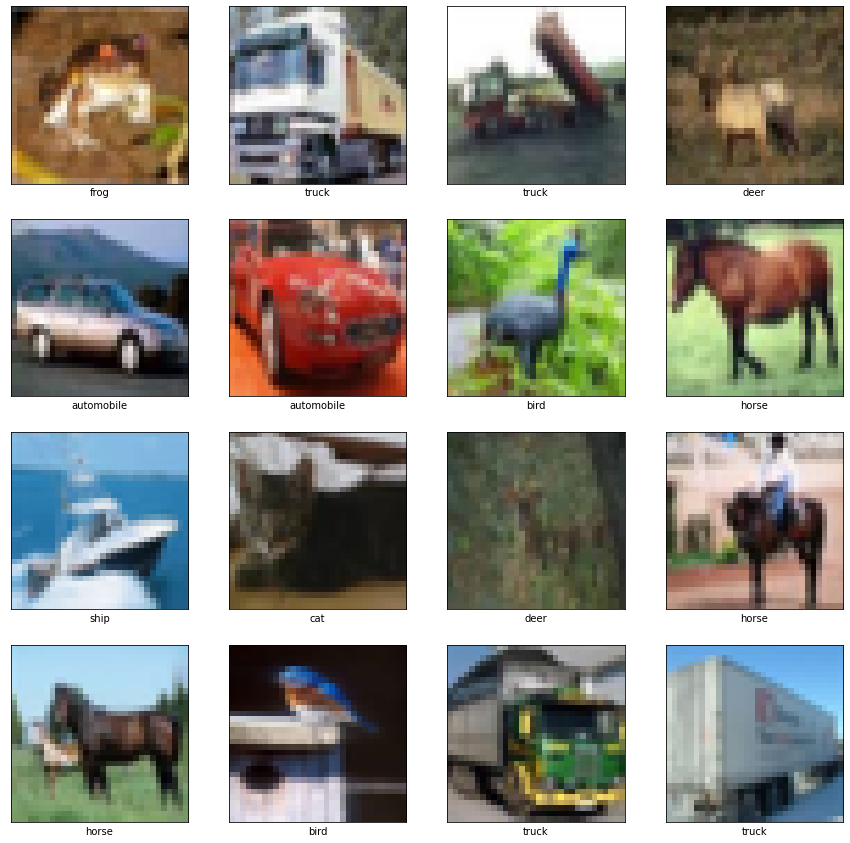

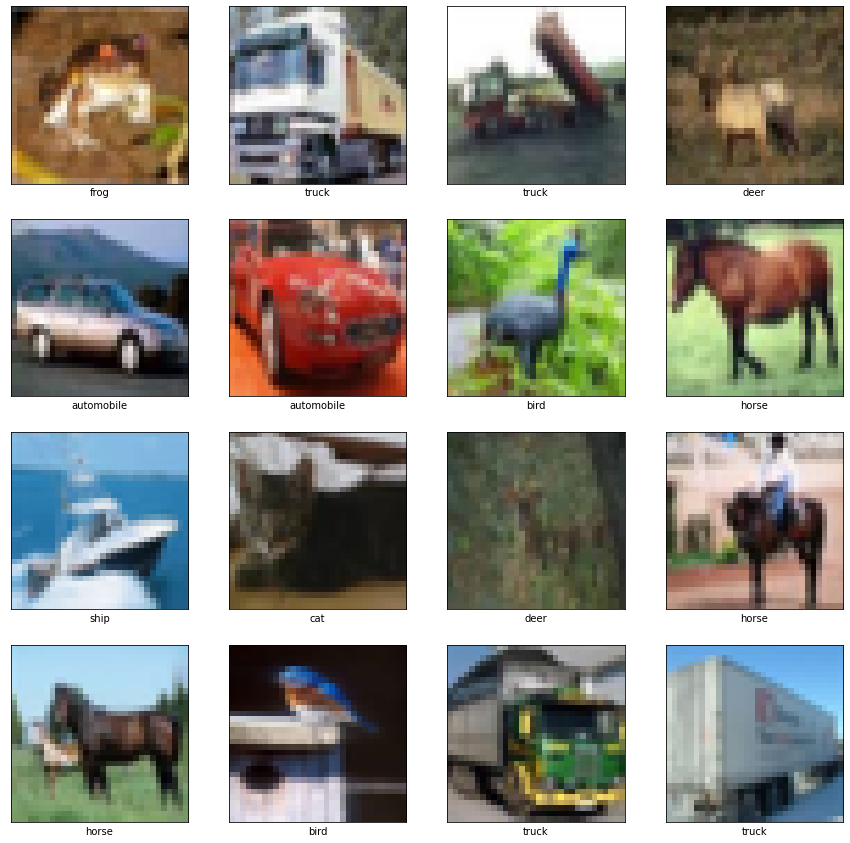

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [3]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

## CNN

In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.5410 - accuracy: 0.4363 - val_loss: 1.2567 - val_accuracy: 0.5505
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1754 - accuracy: 0.5826 - val_loss: 1.0887 - val_accuracy: 0.6121
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0274 - accuracy: 0.6395 - val_loss: 1.0330 - val_accuracy: 0.6387
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9296 - accuracy: 0.6733 - val_loss: 0.9840 - val_accuracy: 0.6555
Epoch 5/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.8523 - accuracy: 0.7026 - val_loss: 0.9144 - val_accuracy: 0.6768
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7989 - accuracy: 0.7198 - val_loss: 0.9143 - val_accuracy: 0.6833
Epoch 7/10
1563/1563 [==============================] - 34s 21ms/step - loss: 0.7465 - accuracy: 0.7376 - val_loss: 0.9257 -

In [7]:
def plot_accuracy_functions(history):    
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    
def plot_loss_functions(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

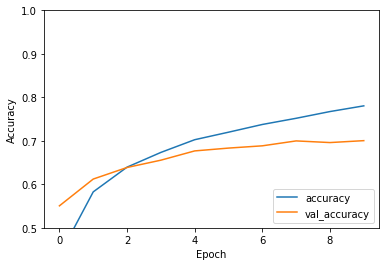

In [8]:
plot_accuracy_functions(history)

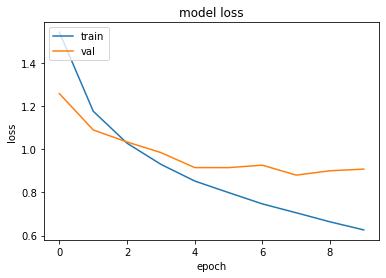

In [9]:
plot_loss_functions(history)

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size= 32, verbose=2)

313/313 - 2s - loss: 0.9074 - accuracy: 0.7004 - 2s/epoch - 5ms/step
